Data Ingestion

In [1120]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [1121]:
df = pd.read_csv("train.csv")

In [1122]:
df.head()

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,0,42,technician,married,secondary,no,7,no,no,cellular,25,aug,117,3,-1,0,unknown,0
1,1,38,blue-collar,married,secondary,no,514,no,no,unknown,18,jun,185,1,-1,0,unknown,0
2,2,36,blue-collar,married,secondary,no,602,yes,no,unknown,14,may,111,2,-1,0,unknown,0
3,3,27,student,single,secondary,no,34,yes,no,unknown,28,may,10,2,-1,0,unknown,0
4,4,26,technician,married,secondary,no,889,yes,no,cellular,3,feb,902,1,-1,0,unknown,1


In [1123]:
df.shape

(750000, 18)

In [1124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 18 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   id         750000 non-null  int64 
 1   age        750000 non-null  int64 
 2   job        750000 non-null  object
 3   marital    750000 non-null  object
 4   education  750000 non-null  object
 5   default    750000 non-null  object
 6   balance    750000 non-null  int64 
 7   housing    750000 non-null  object
 8   loan       750000 non-null  object
 9   contact    750000 non-null  object
 10  day        750000 non-null  int64 
 11  month      750000 non-null  object
 12  duration   750000 non-null  int64 
 13  campaign   750000 non-null  int64 
 14  pdays      750000 non-null  int64 
 15  previous   750000 non-null  int64 
 16  poutcome   750000 non-null  object
 17  y          750000 non-null  int64 
dtypes: int64(9), object(9)
memory usage: 103.0+ MB


In [1125]:
df.isnull().sum()

id           0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

Data Preprocessing

In [1126]:
df.describe()

,id,age,balance,day,duration,campaign,pdays,previous,y
count,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000
mean,374999.500000,40.926395,1204.067397,16.117209,256.229144,2.577008,22.412733,0.298545,0.120651
std,216506.495284,10.098829,2836.096759,8.250832,272.555662,2.718514,77.319998,1.335926,0.325721
min,0.000000,18.000000,-8019.000000,1.000000,1.000000,1.000000,-1.000000,0.000000,0.000000
25%,187499.750000,33.000000,0.000000,9.000000,91.000000,1.000000,-1.000000,0.000000,0.000000
50%,374999.500000,39.000000,634.000000,17.000000,133.000000,2.000000,-1.000000,0.000000,0.000000
75%,562499.250000,48.000000,1390.000000,21.000000,361.000000,3.000000,-1.000000,0.000000,0.000000
max,749999.000000,95.000000,99717.000000,31.000000,4918.000000,63.000000,871.000000,200.000000,1.000000


In [1127]:
df.drop(['day', 'month'], axis=1, inplace=True)

In [1128]:
df.head(5)

,id,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,y
0,0,42,technician,married,secondary,no,7,no,no,cellular,117,3,-1,0,unknown,0
1,1,38,blue-collar,married,secondary,no,514,no,no,unknown,185,1,-1,0,unknown,0
2,2,36,blue-collar,married,secondary,no,602,yes,no,unknown,111,2,-1,0,unknown,0
3,3,27,student,single,secondary,no,34,yes,no,unknown,10,2,-1,0,unknown,0
4,4,26,technician,married,secondary,no,889,yes,no,cellular,902,1,-1,0,unknown,1


In [1129]:
cat_cols = df.select_dtypes(include=['object']).columns
num_cols = df.select_dtypes(exclude=['object']).columns

In [1130]:
cat_cols

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'poutcome'],
      dtype='object')

In [1131]:
for i in df[cat_cols]:
    print(df[i].value_counts())
    print()

job
management       175541
blue-collar      170498
technician       138107
admin.            81492
services          64209
retired           35185
self-employed     19020
entrepreneur      17718
unemployed        17634
housemaid         15912
student           11767
unknown            2917
Name: count, dtype: int64

marital
married     480759
single      194834
divorced     74407
Name: count, dtype: int64

education
secondary    401683
tertiary     227508
primary       99510
unknown       21299
Name: count, dtype: int64

default
no     737151
yes     12849
Name: count, dtype: int64

housing
yes    411288
no     338712
Name: count, dtype: int64

loan
no     645023
yes    104977
Name: count, dtype: int64

contact
cellular     486655
unknown      231627
telephone     31718
Name: count, dtype: int64

poutcome
unknown    672450
failure     45115
success     17691
other       14744
Name: count, dtype: int64



In [1132]:
for i in df[num_cols]:
    print(f'{i}  {df[i].min()} to {df[i].max()}')

id  0 to 749999
age  18 to 95
balance  -8019 to 99717
duration  1 to 4918
campaign  1 to 63
pdays  -1 to 871
previous  0 to 200
y  0 to 1


In [1133]:
df['y'].value_counts()

y
0    659512
1     90488
Name: count, dtype: int64

In [1134]:
# Percentage imbalance in the output column - y
df['y'].value_counts(normalize=True) * 100

y
0    87.934933
1    12.065067
Name: proportion, dtype: float64

In [1135]:
df['pdays'].value_counts(normalize=True) * 100

pdays
-1      89.657867
 182     0.335333
 92      0.303333
 183     0.276533
 181     0.226400
          ...    
 220     0.000133
 835     0.000133
 825     0.000133
 548     0.000133
 493     0.000133
Name: proportion, Length: 596, dtype: float64

In [1136]:
df['pdays'] = df['pdays'].apply(lambda x: 'no' if x <= -1 else 'yes')

In [1137]:
df['previous'].value_counts(normalize=True) * 100

previous
0      89.657467
1       3.778933
2       2.729067
3       1.376800
4       0.831867
5       0.517600
6       0.291067
7       0.230667
8       0.138133
9       0.092933
11      0.067067
10      0.066800
13      0.043600
12      0.042667
14      0.018267
15      0.017333
17      0.013733
16      0.010800
19      0.010267
23      0.009867
18      0.007467
20      0.007467
22      0.005733
24      0.004533
29      0.003867
27      0.003867
28      0.003067
21      0.002933
25      0.002667
26      0.002267
30      0.002000
31      0.001200
36      0.001067
37      0.000933
35      0.000800
38      0.000800
32      0.000667
51      0.000533
43      0.000533
41      0.000533
33      0.000400
34      0.000400
55      0.000267
39      0.000267
40      0.000133
47      0.000133
46      0.000133
200     0.000133
48      0.000133
58      0.000133
Name: proportion, dtype: float64

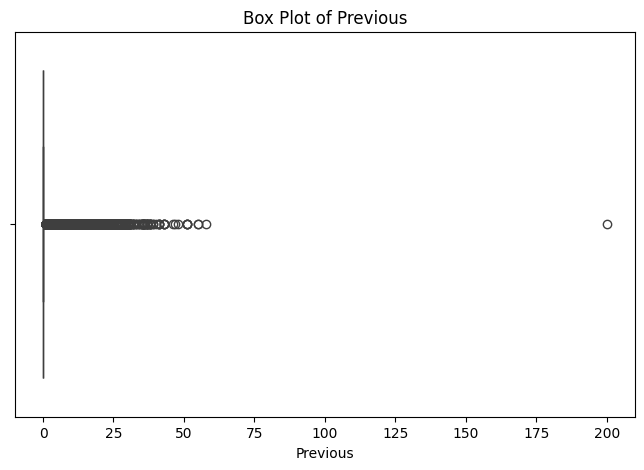

In [1138]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['previous'])
plt.title('Box Plot of Previous')
plt.xlabel('Previous')
plt.show()

In [1139]:
df['previous'] = df['previous'].apply(lambda x: 'yes' if x >= 1 else 'no')

In [1140]:
skew_vals = df.skew(numeric_only=True)
print(skew_vals.apply(lambda x: f"{x:.6f}"))

id           0.000000
age          0.586137
balance     12.304123
duration     2.048776
campaign     4.810437
y            2.329296
dtype: object


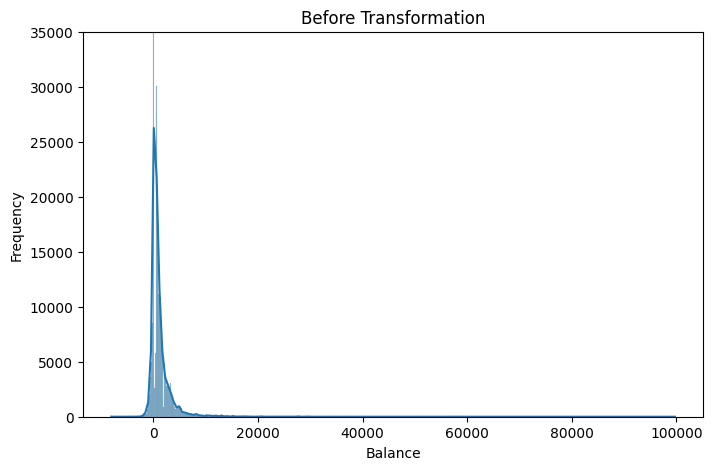

In [1141]:
plt.figure(figsize=(8, 5))
sns.histplot(df['balance'], kde=True)
plt.ylim(0, 35000) 
plt.title('Before Transformation')
plt.xlabel('Balance')
plt.ylabel('Frequency')
plt.show()

In [1142]:
#skewness_value > 0: right skew
#balance , previous --> extremly high skewness -- > Log transformation (if all values > 0):

In [1143]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson')
df['balance'] = pt.fit_transform(df[['balance']])
print(df['balance'].skew())

2.2444079487522606


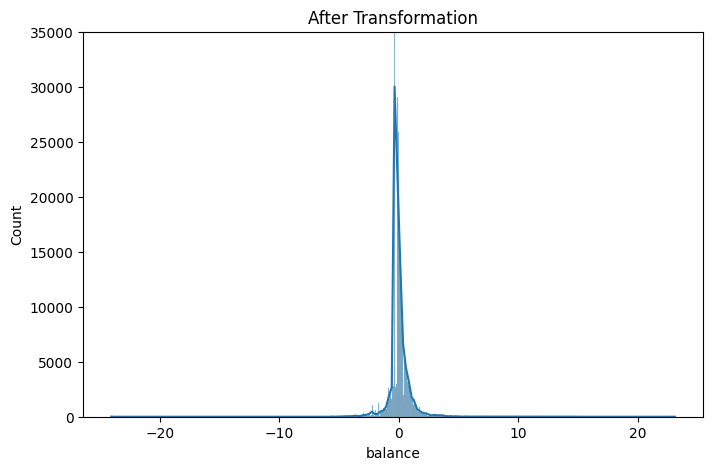

In [1144]:
plt.figure(figsize=(8, 5))
sns.histplot(df['balance'], kde=True)
plt.ylim(0, 35000)
plt.title('After Transformation')
plt.show()

In [1145]:
skew_vals = df.skew(numeric_only=True)
print(skew_vals.apply(lambda x: f"{x:.6f}"))

id          0.000000
age         0.586137
balance     2.244408
duration    2.048776
campaign    4.810437
y           2.329296
dtype: object


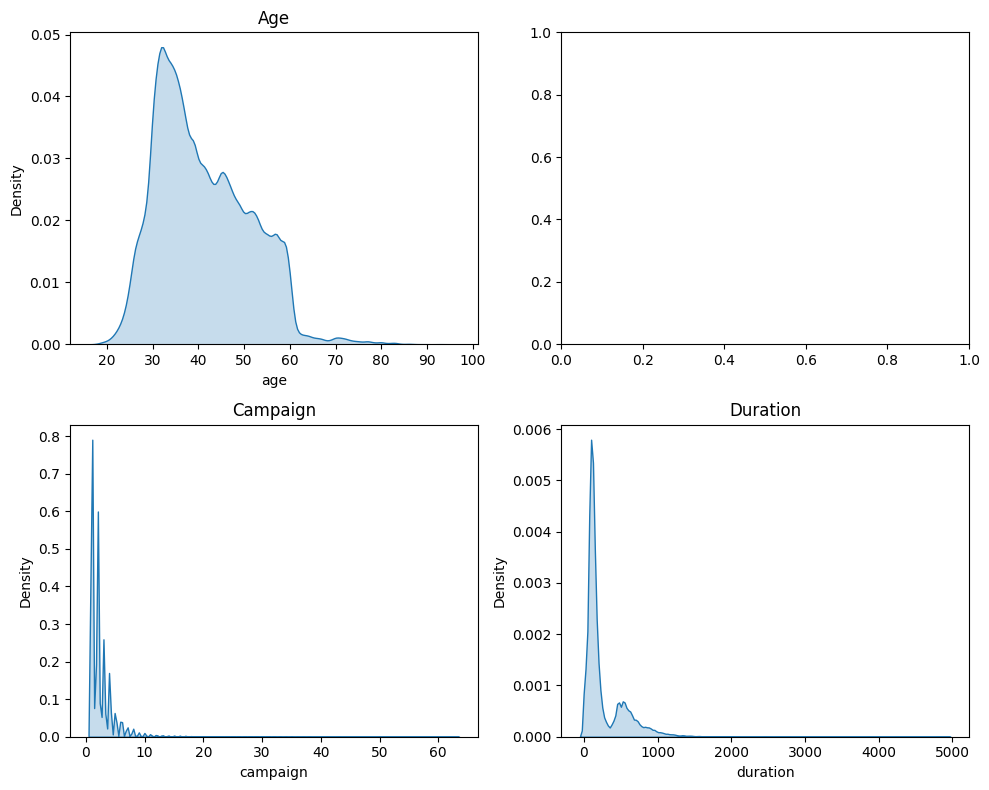

In [1146]:
# Set up 2x2 subplot
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# Plot KDE for each feature
sns.kdeplot(df['age'], ax=axes[0, 0], fill=True)
axes[0, 0].set_title('Age')

sns.kdeplot(df['campaign'], ax=axes[1, 0], fill=True)
axes[1, 0].set_title('Campaign')

sns.kdeplot(df['duration'], ax=axes[1, 1], fill=True)
axes[1, 1].set_title('Duration')

plt.tight_layout()
plt.show()

In [1147]:
from scipy.stats import boxcox
skewed_cols = ['duration', 'campaign', 'age']
for col in skewed_cols:
    col_data = df[col]
    df[col], _ = boxcox(col_data)

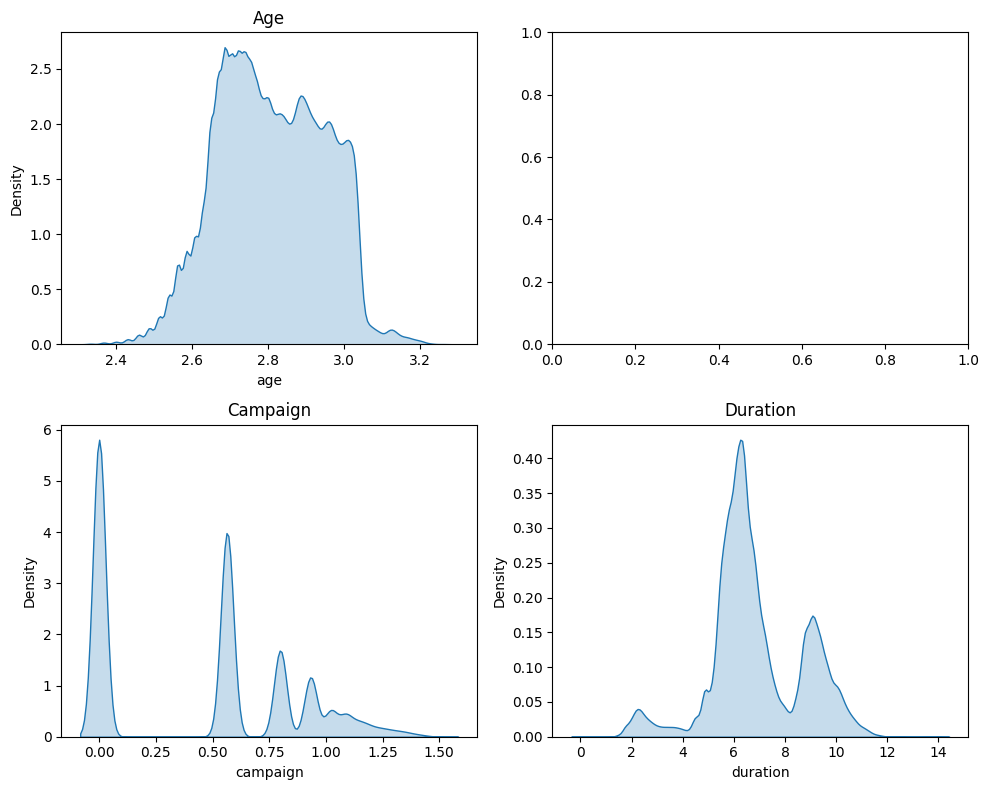

In [1148]:
# Set up 2x2 subplot
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# Plot KDE for each feature
sns.kdeplot(df['age'], ax=axes[0, 0], fill=True)
axes[0, 0].set_title('Age')

sns.kdeplot(df['campaign'], ax=axes[1, 0], fill=True)
axes[1, 0].set_title('Campaign')

sns.kdeplot(df['duration'], ax=axes[1, 1], fill=True)
axes[1, 1].set_title('Duration')

plt.tight_layout()
plt.show()

In [1149]:
skew_vals = df.skew(numeric_only=True)
print(skew_vals.apply(lambda x: f"{x:.6f}"))

id          0.000000
age         0.008136
balance     2.244408
duration    0.014465
campaign    0.176148
y           2.329296
dtype: object
